In [65]:
from sympy import symbols, sqrt, Piecewise, init_printing, diff, Derivative, latex, lambdify
from sympy.functions import Abs
from sympy.plotting import plot
from matplotlib import pyplot as pl
init_printing(use_unicode=True)
from IPython.display import display, Latex, Math

In [66]:
a = symbols('a') #actual value
p = symbols('p') #predicted value
w = symbols('w') #leaf weight
delta = symbols('delta') #loss function parameter

# Different robust loss functions

In [67]:
def pseudo_huber(delta,a,p):
    return delta**2*(sqrt(1+((a-p)/delta)**2)-1)

def weighted_pseudo_huber(w, delta, a, p):
    return delta**2*(sqrt(1+((a-w*p)/delta)**2)-1)

huber = lambda delta,a,p: Piecewise((0.5*(a-p)**2, Abs(a-p) <= delta), (delta*Abs(a-p)-0.5*delta**2, True))
mae = lambda a,p: Abs(a-p)

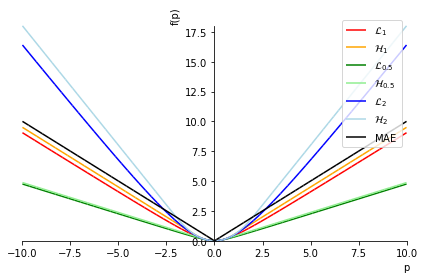

In [68]:
p1 = plot(pseudo_huber(1.0, 0,p), show=False, legend=True, line_color='red')
p1[0].label='$\\mathcal{L}_{1}$'
p05 = plot(pseudo_huber(0.5, 0,p), show=False, line_color='green')
p05[0].label='$\\mathcal{L}_{0.5}$'
p2 = plot(pseudo_huber(2.0, 0,p), show=False, line_color='blue')
p2[0].label='$\\mathcal{L}_{2}$'
h1 = plot(huber(1.0, 0, p), show=False, line_color='orange')
h1[0].label='$\\mathcal{H}_{1}$'
h2 = plot(huber(2.0, 0, p), show=False, line_color='lightblue')
h2[0].label='$\\mathcal{H}_{2}$'
h05 = plot(huber(0.5, 0, p), show=False, line_color='lightgreen')
h05[0].label='$\\mathcal{H}_{0.5}$'
m = plot(mae(0, p), show=False, line_color='black')
m[0].label='$\\mathrm{MAE}$'
p1.extend(h1)
p1.extend(p05)
p1.extend(h05)
p1.extend(p2)
p1.extend(h2)
p1.extend(m)
p1.show()

# Plot quadratic approximations

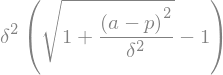

\delta^{2} \left(\sqrt{1 + \frac{\left(a - p\right)^{2}}{\delta^{2}}} - 1\right)


In [69]:
ph = delta**2*(sqrt(1+((a-p)/delta)**2)-1)
display(ph)
print(latex(ph))

### First derivative

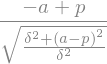

\frac{- a + p}{\sqrt{\frac{\delta^{2} + \left(a - p\right)^{2}}{\delta^{2}}}}


In [70]:
diff1 = ph.diff(p)
display(diff1.simplify())
print(latex(diff1.simplify()))

### Second derivative

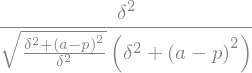

\frac{\delta^{2}}{\sqrt{\frac{\delta^{2} + \left(a - p\right)^{2}}{\delta^{2}}} \left(\delta^{2} + \left(a - p\right)^{2}\right)}


In [71]:
diff2 = ph.diff(p, p)
display(diff2.simplify())
print(latex(diff2.simplify()))

In [72]:
pi = symbols('p_i')
ai = symbols('a_i')


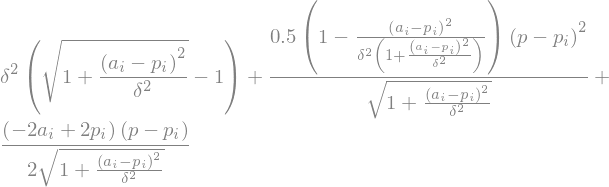

In [73]:
L_T = ph.subs({a:ai,p:pi}) + diff1.subs({a:ai,p:pi})*(p-pi) + 1/2*diff2.subs({a:ai, p:pi})*(p-pi)**2
display(L_T)

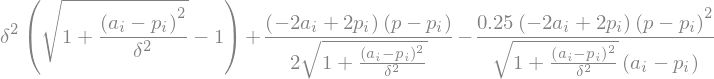

In [74]:
L_D = ph.subs({a:ai,p:pi}) + diff1.subs({a:ai,p:pi})*(p-pi) - 1/2*diff1.subs({a:ai, p:pi})/(ai-pi)*(p-pi)**2
display(L_D)

Let $a_i$ and $p_i$ denote the actual and predicted value of th $i^\mathrm{th}$ example respectively. The true loss is given by

$$L_\delta=\delta^{2} \left(\sqrt{1 + \frac{\left(a - p\right)^{2}}{\delta^{2}}} - 1\right)$$

We'll consider:
1. Taylor expansion of $L_\delta(p)$ about $p_i$:
$$L_\delta^T(p) = \delta^{2} \left(\sqrt{1 + \frac{\left(a_i - p_i\right)^{2}}{\delta^{2}}} - 1\right)
+ \frac{- a_i + p_i}{\sqrt{\frac{\delta^{2} + \left(a_i - p_i\right)^{2}}{\delta^{2}}}}(p-p_i)
+ \frac{\delta^{2}}{2\sqrt{\frac{\delta^{2} + \left(a_i - p_i\right)^{2}}{\delta^{2}}} \left(\delta^{2} + \left(a_i - p_i\right)^{2}\right)} (p-p_i)^2
$$
2. Match value and derivative at $p_i$ and have minimum at $a_i$
$$
L_{\delta}^{\mathrm{D}} = \delta^{2} \left(\sqrt{1 + \frac{\left(a_i - p_i\right)^{2}}{\delta^{2}}} - 1\right)
+ \frac{- a_i + p_i}{\sqrt{\frac{\delta^{2} + \left(a_i - p_i\right)^{2}}{\delta^{2}}}}(p-p_i)
+ \frac{- a_i + p_i}{2\sqrt{\frac{\delta^{2} + \left(a_i - p_i\right)^{2}}{\delta^{2}}}\left(a_i-p_i\right)}(p-p_i)^2
$$

In [75]:
def plot_pi(pival, amin=0):
    Lsub = ph.subs({delta:1.0, a: amin})
    L_Tsub = L_T.subs({delta:1.0, ai: amin, pi:pival})
    L_Dsub = L_D.subs({delta:1.0, ai: amin, pi:pival})
    display(Latex("Values at $p_i$: $$L_1 = {:.3f}\\, L_1^T = {:.3f}\\, L_1^D = {:.3f}$$"
                  .format(float(Lsub.subs({p:pival}).evalf()),
                          float(L_Tsub.subs({p:pival}).evalf()),
                          float(L_Dsub.subs({p:pival}).evalf()),
                         )))
    display(Latex("Values at $a_i$: $$L_1 = {:.3f}\\, L_1^T = {:.3f}\\, L_1^D = {:.3f}$$"
                  .format(float(Lsub.subs({p:amin}).evalf()),
                          float(L_Tsub.subs({p:amin}).evalf()),
                          float(L_Dsub.subs({p:amin}).evalf()),
                         )))
    display(Latex("Derivatives at $p_i$:$$L_1 = {:.3f}\\, L_1^T = {:.3f}\\, L_1^D = {:.3f}$$"
                  .format(float(Lsub.diff(p).subs({p:pival}).evalf()),
                          float(L_Tsub.diff(p).subs({p:pival}).evalf()),
                          float(L_Dsub.diff(p).subs({p:pival}).evalf()),
                         )))
    p1 = plot(Lsub, L_Tsub, L_Dsub, show=False, legend=True, title=r"$p_i={}$".format(pival))
    p1[0].label='$L_{1}$'
    p1[0].line_color='red'
    p1[1].label='$L_{1}^{\mathrm{T}}$'
    p1[1].line_color='blue'
    p1[2].label='$L_{1}^{\mathrm{D}}$'
    p1[2].line_color='green'
    
    p1.show()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

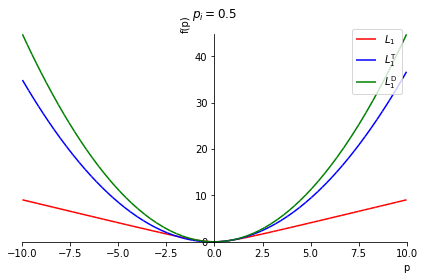

In [76]:
plot_pi(0.5)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

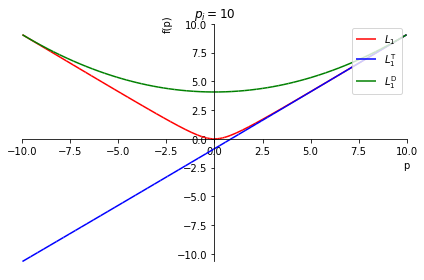

In [77]:
plot_pi(10)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

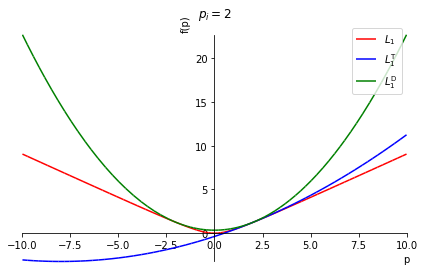

In [78]:
plot_pi(2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

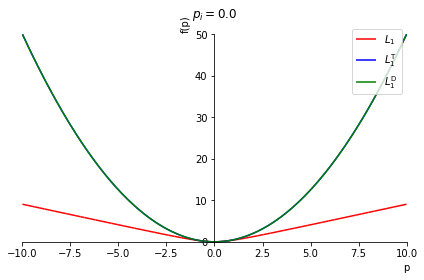

In [79]:
plot_pi(0.0)

# Convergence in XGBoost

In [80]:
import numpy as np
import xgboost as xgb
from typing import Tuple
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets

## Synthetic data

In [81]:
# X = pd.read_csv('data/housesalesprediction/kc_house_data.csv')

# y = np.array(X['price'])

# X.drop(columns=['id', 'date', 'price', 'zipcode', 'lat', 'long', 'sqft_living15',
#        'sqft_lot15'], inplace=True) # the last once just to keep training faster
def make_dataset(number_samples, ratio_outliers, noise_normal, noise_outliers):
    
    X, y = datasets.make_friedman1(int(number_samples*(1-ratio_outliers)), noise=noise_normal)
    X_outliers, y_outliers = datasets.make_friedman1(int(number_samples*ratio_outliers), noise=noise_outliers)
    X = np.concatenate((X, X_outliers))
    y = np.concatenate((y, y_outliers))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    return dtrain, dtest

In [112]:
def phuber(predt: np.ndarray, dtrain: xgb.DMatrix, delta=1.0) -> Tuple[str, float]:
    ''' Mean squared log error metric.'''
    delta = 1.0
    y = dtrain.get_label()
#     predt[predt < -1] = -1 + 1e-6
    elements = delta**2*(np.sqrt(1+np.square((y-predt)/delta))-1)
    return 'Huber', float(np.mean(elements))

def evaluate(gradient, hessian, dtrain, dtest,eta=0.1, lambda_=1.0, num_rounds=20, deltaval=1.0):
    
    def custom_objective(predt: np.ndarray,
                    dtrain: xgb.DMatrix) -> Tuple[np.ndarray, np.ndarray]:
        '''Evaluate using custom objective'''
        grad = gradient(predt, dtrain.get_label())
        hess = hessian(predt, dtrain.get_label())
#         print("Grad norm: {:.2E} Hess norm: {:.2E}".format(np.linalg.norm(grad), np.linalg.norm(hess)))
        return grad, hess
    results = {}

    xgb.train({'tree_method': 'hist', 
               'disable_default_eval_metric': 0, 'eta': eta, 'lambda': lambda_},
              dtrain=dtrain,
              num_boost_round=num_rounds,
              obj=custom_objective,
              feval=lambda p, a: phuber(p, a, deltaval),
              evals=[(dtrain, 'dtrain'), (dtest, 'dtest')],
              verbose_eval=False,
            evals_result=results)
    return results


def build_gradient_hessian(func, deltaval=1.0):
    gradient = lambda predt, label: np.vectorize(lambdify((pi, ai), func.diff(p).subs({delta:deltaval, p:pi})))(predt, label)
    hessian = lambda predt, label: np.vectorize(lambdify(( pi, ai), func.diff(p, p).subs({delta:deltaval, p:pi})))(predt, label)
    return gradient, hessian

In [83]:
parameters0 = {
"number_samples": 10000,
"ratio_outliers": 0.01,
"noise_normal": 1.0,
"noise_outliers": 100.0,
"deltaval": 1.0,
"eta": 0.1,
"lambda_": 1.0,
"num_rounds": 30
}

In [113]:
def comparison_run(number_samples, ratio_outliers, noise_normal, noise_outliers, deltaval, eta, lambda_, num_rounds):
    gradient_taylor, hessian_taylor = build_gradient_hessian(L_T, deltaval=deltaval)
    gradient_quadratic, hessian_quadratic = build_gradient_hessian(L_D, deltaval=deltaval)
    def gradient_mse(pred,y):
        pred = pred.ravel()
        diff = pred-y
        g = 2.0*diff
        return g

    def hessian_mse(pred, dtrain):
        h = np.ones(pred.shape)*2.0
        return h

    dtrain, dtest = make_dataset(number_samples=number_samples, 
                                 ratio_outliers=ratio_outliers, 
                                 noise_normal=noise_normal, 
                                 noise_outliers=noise_outliers)

    
    results_taylor = evaluate(gradient=gradient_taylor, hessian=hessian_taylor, dtrain=dtrain, dtest=dtest, 
                              eta=eta, lambda_=lambda_, num_rounds=num_rounds, deltaval=deltaval)
    results_quadratic = evaluate(gradient=gradient_quadratic, hessian=hessian_quadratic, dtrain=dtrain, dtest=dtest, 
                              eta=eta, lambda_=lambda_, num_rounds=num_rounds, deltaval=deltaval)
    results_mse = evaluate(gradient=gradient_mse, hessian=hessian_mse, dtrain=dtrain, dtest=dtest, 
                              eta=eta, lambda_=lambda_, num_rounds=num_rounds, deltaval=deltaval)

    pl.plot(results_mse['dtrain']['Huber'], 'r-', label='MSE train')
    pl.plot(results_mse['dtest']['Huber'], 'r--', label='MSE test')
    pl.plot(results_quadratic['dtrain']['Huber'], 'g-', label='Quadratic train')
    pl.plot(results_quadratic['dtest']['Huber'], 'g--', label='Quadratic test')
    pl.plot(results_taylor['dtrain']['Huber'], 'b-', label='Taylor train')
    pl.plot(results_taylor['dtest']['Huber'], 'b--', label='Taylor test')
    pl.yscale('log')
    pl.ylabel('Huber loss')
#     pl.ylim((1.0, 5.0))
    pl.xlabel('Round')
    pl.legend()
    _ = pl.suptitle(r"samples:{number_samples}, outliers:{ratio_outliers}, $\sigma_n$:{noise_normal},$\sigma_o:${noise_outliers}, $\delta$:{deltaval}, $\eta$:{eta}, $\lambda$:{lambda_}".format(
        number_samples = number_samples, ratio_outliers=ratio_outliers, noise_normal=noise_normal, 
        noise_outliers = noise_outliers, deltaval=deltaval, eta=eta, lambda_=lambda_
    ))
    pl.show()

### Different $\eta$

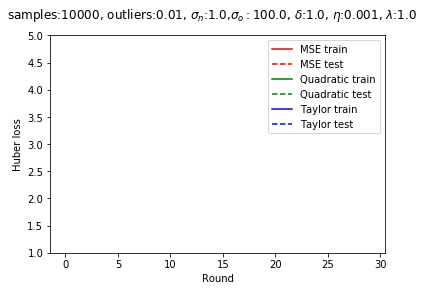

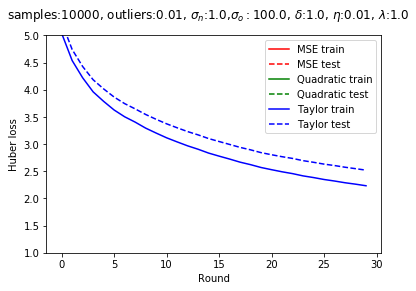

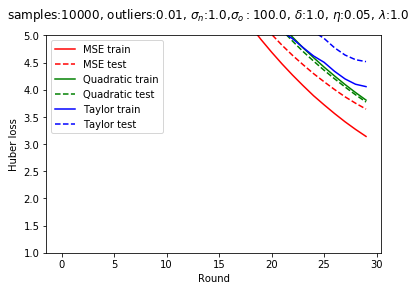

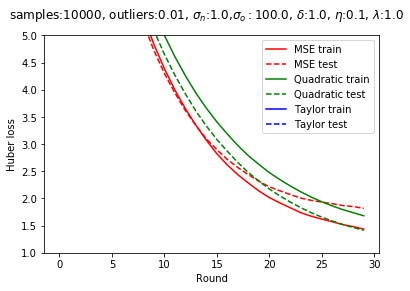

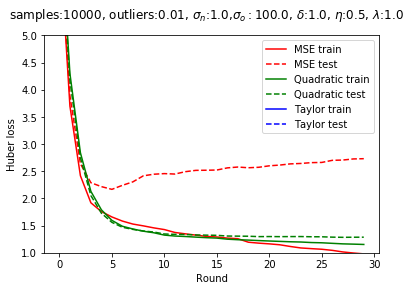

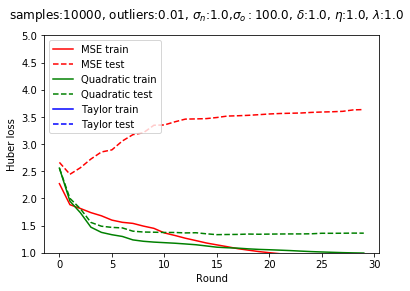

In [85]:
for eta in [0.001,  0.01, 0.05, 0.1, 0.5, 1.0]:
    parameters = dict(parameters0)
    parameters['eta'] = eta
    comparison_run(**parameters)

### Different $\lambda$

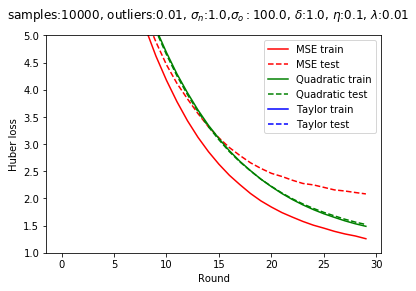

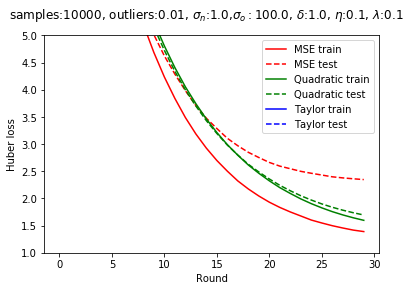

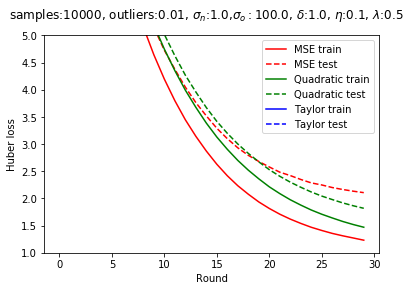

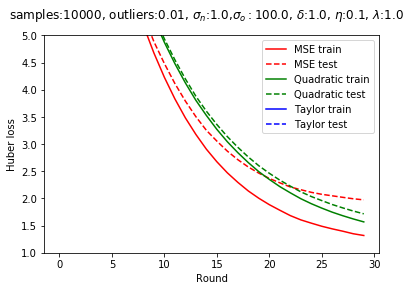

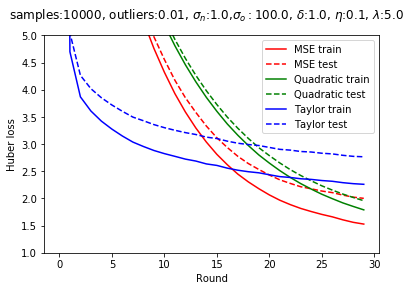

In [86]:
for lambda_ in [0.01, 0.1, 0.5, 1.0, 5.0]:
    parameters = dict(parameters0)
    parameters['lambda_'] = lambda_
    comparison_run(**parameters)

### Different $\delta$

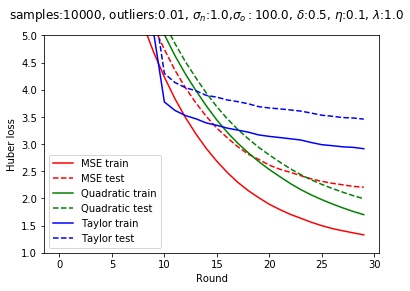

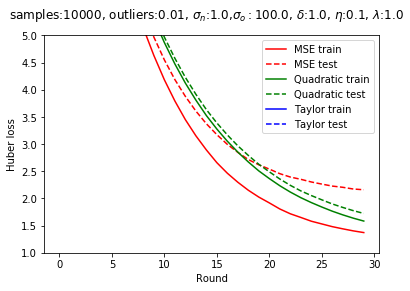

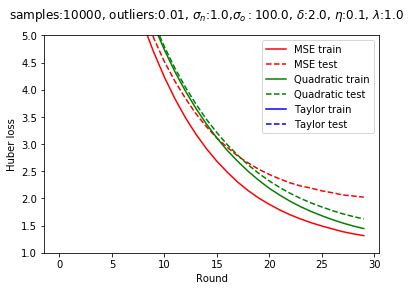

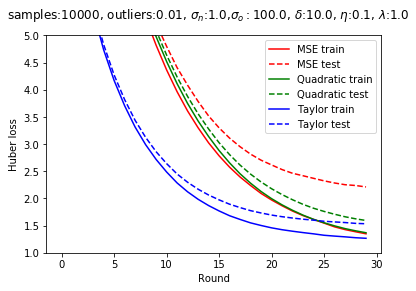

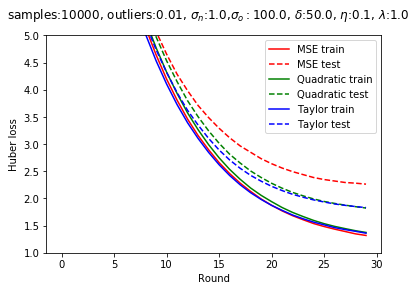

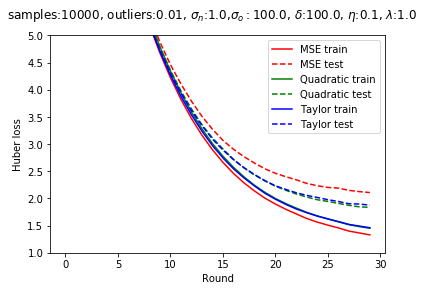

In [87]:
for deltaval in [0.5, 1.0, 2.0, 10.0, 50.0, 100.0]:
    parameters = dict(parameters0)
    parameters['deltaval'] = deltaval
    comparison_run(**parameters)

### Different ratio outliers

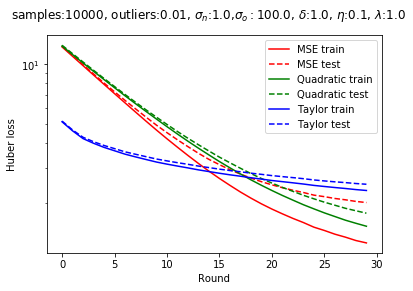

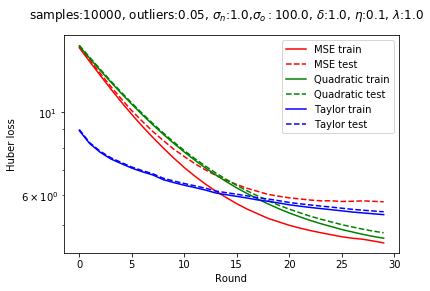

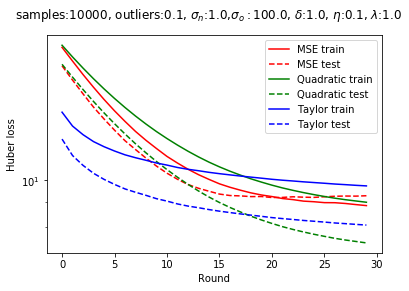

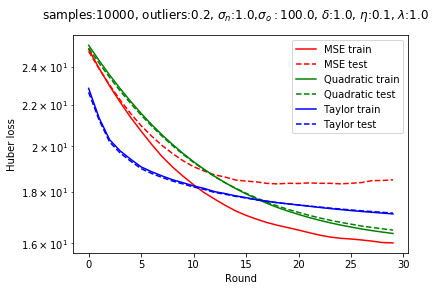

In [97]:
for ratio_outliers in [0.01, 0.05, 0.1, 0.2]:
    parameters = dict(parameters0)
    parameters['ratio_outliers'] = ratio_outliers
    comparison_run(**parameters)

### Different normal noise $\sigma_n$ 

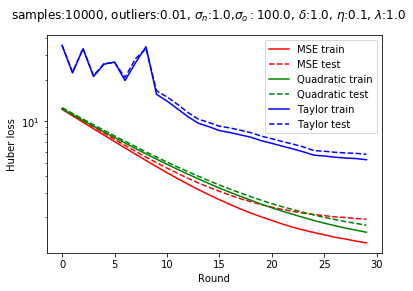

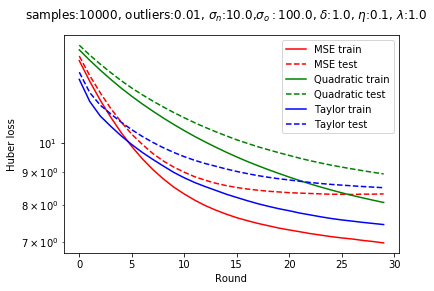

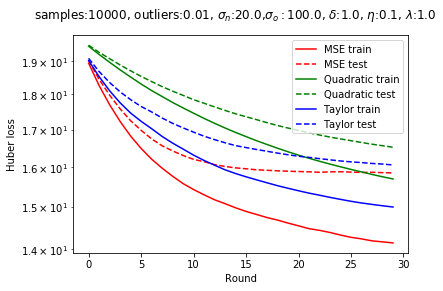

In [105]:
for noise_normal in [1.0, 10.0, 20.0]:
    parameters = dict(parameters0)
    parameters['noise_normal'] = noise_normal
    comparison_run(**parameters)

## Best Hyperparameters

We focus on finding optimal $\eta$.

In [121]:
def evaluate(gradient, hessian, dtrain, dtest,eta=0.1, lambda_=1.0, num_rounds=20, deltaval=1.0):
    
    def custom_objective(predt: np.ndarray,
                    dtrain: xgb.DMatrix) -> Tuple[np.ndarray, np.ndarray]:
        '''Evaluate using custom objective'''
        grad = gradient(predt, dtrain.get_label())
        hess = hessian(predt, dtrain.get_label())
#         print("Grad norm: {:.2E} Hess norm: {:.2E}".format(np.linalg.norm(grad), np.linalg.norm(hess)))
        return grad, hess
    results = {}
    params = {'tree_method': 'hist', 
               'disable_default_eval_metric': 1, 'lambda': lambda_}
    min_huber = float("Inf")
    for eta in np.logspace(np.log10(0.001), np.log10(1.0), 10):
        params['eta'] = eta
        cv_results = xgb.cv(params, dtrain, num_boost_round=30, 
                            nfold=3, early_stopping_rounds=10,               
                            obj=custom_objective, feval=lambda a,p:phuber(a, p, deltaval)) 
        mean_huber = cv_results['test-Huber-mean'].min()
        if mean_huber < min_huber:
            min_huber = mean_huber
            best_params = dict(params)
    print("\tEta: {:.4f}\tHuber {:.4f}".format(
        best_params['eta'], mean_huber))
    xgb.train(best_params,
              dtrain=dtrain,
              num_boost_round=num_rounds,
              obj=custom_objective,
              feval=phuber,
              evals=[(dtrain, 'dtrain'), (dtest, 'dtest')],
              verbose_eval=False,
            evals_result=results)
    return results

### Different normal noise $\sigma_n$ 

/home/valeriy/Documents/workspace/valeriy42/msle-approximations/env/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


	Eta: 0.0215	Huber 742.2320
	Eta: 0.2154	Huber 1.5733
	Eta: 0.1000	Huber 2.8814


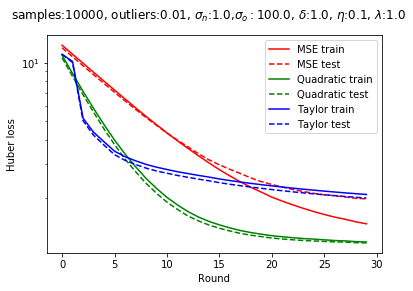

	Eta: 0.1000	Huber 43.4715
	Eta: 0.2154	Huber 8.3936
	Eta: 0.1000	Huber 8.6686


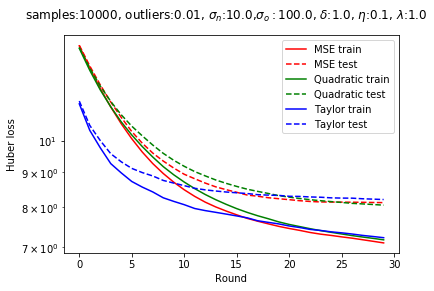

	Eta: 0.1000	Huber 23.0870
	Eta: 0.2154	Huber 16.2520
	Eta: 0.1000	Huber 16.4985


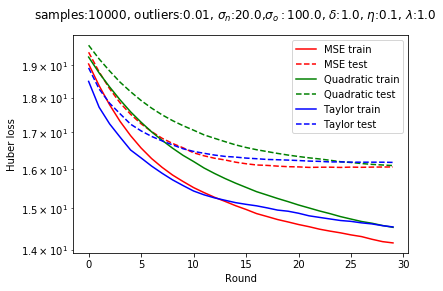

In [117]:
for noise_normal in [1.0, 10.0, 20.0]:
    parameters = dict(parameters0)
    parameters['noise_normal'] = noise_normal
    comparison_run(**parameters)

### Different ratio outliers

/home/valeriy/Documents/workspace/valeriy42/msle-approximations/env/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


	Eta: 0.0215	Huber 742.2320
	Eta: 0.2154	Huber 1.5733
	Eta: 0.1000	Huber 2.8814


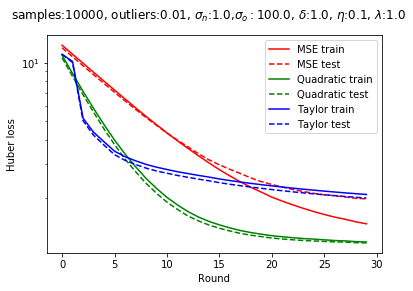

	Eta: 0.0215	Huber 703.5210
	Eta: 0.2154	Huber 4.8952
	Eta: 0.1000	Huber 6.8023


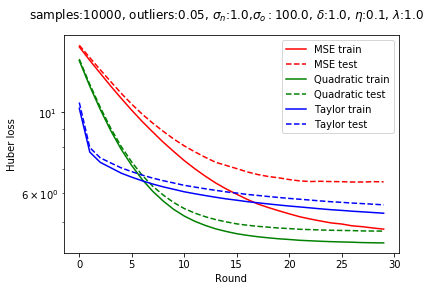

	Eta: 0.0215	Huber 582.0851
	Eta: 0.2154	Huber 9.1611
	Eta: 0.1000	Huber 12.0355


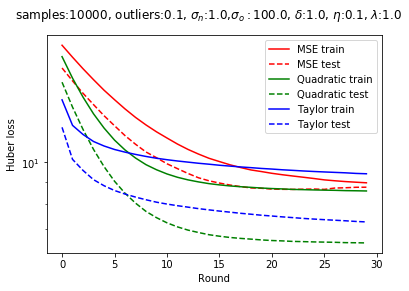

	Eta: 0.0215	Huber 548.9584
	Eta: 0.2154	Huber 16.7717
	Eta: 0.1000	Huber 20.3230


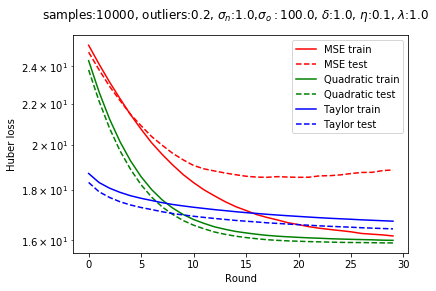

In [118]:
for ratio_outliers in [0.01, 0.05, 0.1, 0.2]:
    parameters = dict(parameters0)
    parameters['ratio_outliers'] = ratio_outliers
    comparison_run(**parameters)

### Individual runs

	Eta: 0.1000	Huber 29.4696
	Eta: 0.2154	Huber 1.8095
	Eta: 0.1000	Huber 2.8382


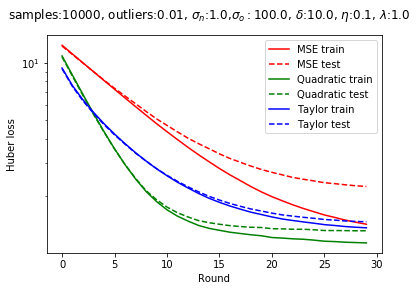

In [122]:
parameters = dict(parameters0)
parameters['deltaval'] = 10.0
comparison_run(**parameters)

In [123]:
np.logspace(np.log10(0.001), np.log10(1.0), 10)

array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
       0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ])